In [14]:
cd ..

/home/jwen/smoke_segmentation


In [15]:
cd src

/home/jwen/smoke_segmentation/src


In [16]:
import satpy as sp
import xarray as xr
import time
import numpy as np
import numpy.ma as ma
import pandas as pd
from datetime import datetime
from pyresample.geometry import AreaDefinition
from pyproj import Proj
from matplotlib import pyplot as plt
from utils import helpers as h
from utils import data_downloader as dd
from utils import data_vis as dv
import matplotlib as mpl
import geopandas as gpd
import rasterio
import rasterio.mask
import glob

%matplotlib inline

In [17]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Use SatPy to read in .nc files

In [18]:
!pwd

/home/jwen/smoke_segmentation/src


In [19]:
files = sp.find_files_and_readers(start_time=datetime(2018, 7, 22, 0, 0),
                               end_time=datetime(2018, 7, 22, 2, 0),
                               base_dir='../data/temp_netcdf',
                               reader='abi_l1b')

scn = sp.Scene(reader='abi_l1b', filenames=files)
# scn.load(['true_color','C07'])

In [20]:
files

{'abi_l1b': ['../data/temp_netcdf/OR_ABI-L1b-RadC-M3C01_G16_s20182030147290_e20182030150063_c20182030150109.nc',
  '../data/temp_netcdf/OR_ABI-L1b-RadC-M3C02_G16_s20182030147290_e20182030150063_c20182030150106.nc',
  '../data/temp_netcdf/OR_ABI-L1b-RadC-M3C03_G16_s20182030147290_e20182030150063_c20182030150109.nc',
  '../data/temp_netcdf/OR_ABI-L1b-RadC-M3C07_G16_s20182030147290_e20182030150075_c20182030150111.nc',
  '../data/temp_netcdf/OR_ABI-L1b-RadC-M3C11_G16_s20182030147290_e20182030150063_c20182030150110.nc']}

In [12]:
scn.load(['true_color','C07'])
width=5000
height=2500
bounds = (-124.5, 24.4, -66.6, 49.3)

area_id = 'blah'
description = "{} in {}".format('blah', 'proj_desc')
proj_id = 'blah'
proj_dict = "epsg:4326"
area_def = AreaDefinition(area_id, proj_id, description, proj_dict, width, height, bounds)

scn = scn.resample(area_def, resampler='nearest', cache_dir='../.satpy_temp')

/opt/conda/envs/geo_py38/lib/python3.8/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()
The following datasets were not created and may require resampling to be generated: DataID(name='true_color')
/opt/conda/envs/geo_py38/lib/python3.8/site-packages/pyresample/spherical.py:119: RuntimeWarning: invalid value encountered in true_divide
  self.cart /= np.sqrt(np.einsum('...i, ...i', self.cart, self.cart))
/opt/conda/envs/geo_py38/lib/python3.8/site-packages/pyresample/spherical.py:171: RuntimeWarning: invalid value encountered in double_scalars
  return (val + mod) % (2 * mod) - mod
/opt/conda/envs/geo_py38/lib/python3.8/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ str

In [ ]:
scn.show('true_color')

In [95]:
scn.all_composite_names()

['cimss_green',
 'cimss_green_sunz',
 'cimss_green_sunz_rayleigh',
 'cimss_true_color',
 'cimss_true_color_sunz',
 'cimss_true_color_sunz_rayleigh',
 'color_infrared',
 'green',
 'green_crefl',
 'green_nocorr',
 'green_raw',
 'land_cloud',
 'natural_color',
 'natural_color_nocorr',
 'natural_color_raw',
 'true_color',
 'true_color_crefl',
 'true_color_nocorr',
 'true_color_raw']

In [5]:
cali_bounds = (-124.48200299999999, 32.528832, -114.131211, 42.009502999999995)

scn.load(['true_color','C07'])
test_scn = scn.resample(resampler='native')

width = 1000    # width of the result domain in pixels
height = 1000   # height of the result domain in pixels

area_id = "California"
description = "California in Geodetic Projection"
proj_id = 'California'
proj_dict = {"proj": "latlong", "lat_ts": 0, "lon_0": 0}
area_def = AreaDefinition(area_id, proj_id, description, proj_dict, width, height, cali_bounds)

/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()
/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()
/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()
/opt/conda/lib/python3.8/site-packages/pyproj/crs/crs.py:5

In [ ]:
test_scn = test_scn.resample(area_def, resampler='nearest')
test_scn.show('C07')

In [16]:
test_scn.attrs

{'sensor': {'abi'},
 'start_time': datetime.datetime(2018, 7, 25, 22, 2, 19, 700000),
 'end_time': datetime.datetime(2018, 7, 25, 22, 4, 58, 200000)}

/opt/conda/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))
/opt/conda/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))
/opt/conda/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/opt/conda/lib/python3.8/site-packages/satpy/composites/__init__.py:857: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(av_data.reshape(new_shape), axis=(1, 3))


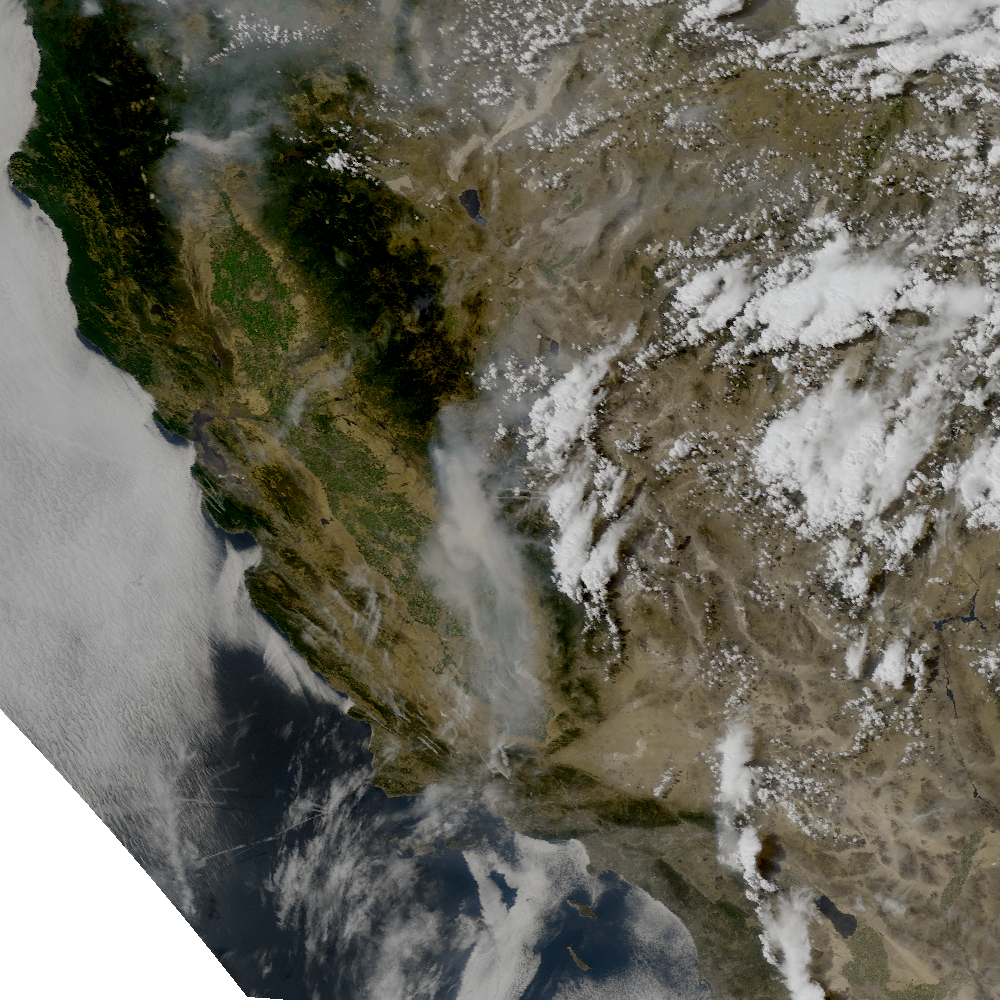

In [7]:
test_scn.show('true_color')

## Testing file saving from SatPy

In [ ]:
test_scn.save_datasets(writer='cf', datasets=['true_color','C07'], filename='abi_true_color_C07_test.nc')

No time dimension in datasets, skipping time bounds creation.
/opt/conda/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))
/opt/conda/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))
/opt/conda/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for a in args))


In [10]:
# test_scn.save_dataset(composite, './goes_16_ca_%s_rgb_%s.png' %
#                  (composite, scn.attrs['start_time'].strftime('%Y%m%d%H%M')))

test_scn.save_datasets(writer='geotiff',
                       datasets=['true_color'], 
                       filename="{name}_{start_time:%Y%m%d_%H%M%S}.tiff")

/opt/conda/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in cos
  return func(*(_execute_task(a, cache) for a in args))
/opt/conda/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in sin
  return func(*(_execute_task(a, cache) for a in args))
/opt/conda/lib/python3.8/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in log
  return func(*(_execute_task(a, cache) for a in args))
/opt/conda/lib/python3.8/site-packages/satpy/composites/__init__.py:857: RuntimeWarning: Mean of empty slice
  data_mean = np.nanmean(av_data.reshape(new_shape), axis=(1, 3))


In [257]:
test= xr.open_dataset('abi_true_color_C07_test.nc')

## Read in Generated GeoTIFF

In [5]:
src_file_name = 'true_color_G16_doy206_s201807252202_e201807252204.tiff'
src = rasterio.open("../data/img/" + src_file_name)

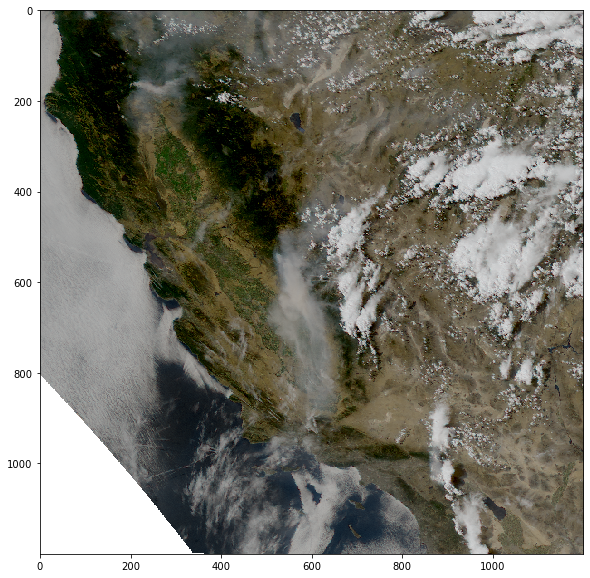

In [6]:
plt.figure(figsize=(10,10))
plt.imshow(rasterio.plot.reshape_as_image(src.read()))

## Testing out masking of shape polygons

In [7]:
# read in the plume data
plumes_2018_df = gpd.read_file('../data/ca_nv_2018_plumes.geojson')

In [11]:
# split string to get smoke plume filter parameters
split_string = src_file_name.split('/')[-1].split('_')[4]
year = split_string[1:5]
month = split_string[5:7]
day = split_string[7:9]
time = split_string[-4:]

test = plumes_2018_df[(plumes_2018_df['year'] == year) &
               (plumes_2018_df['month'] == month) &
               (plumes_2018_df['day'] == day)]

test_values = test['geometry'].values

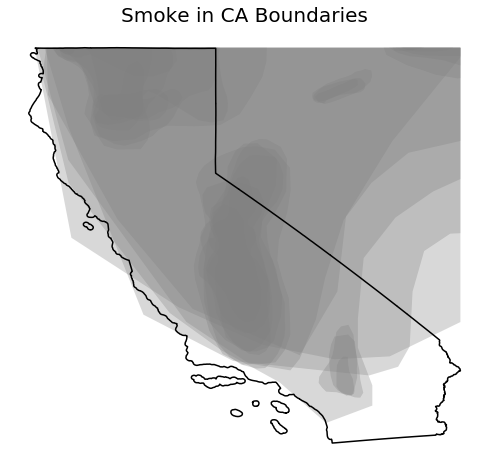

In [12]:
fig, ax = plt.subplots(figsize=(12, 8))
test.plot(ax=ax, alpha=0.3, color="grey")
state_shapes[state_shapes['STUSPS']=='CA'].boundary.plot(ax=ax, color='black')
#box_df.boundary.plot(ax=ax, color="black")
ax.set_title("Smoke in CA Boundaries", fontsize=20)
ax.set_axis_off()
plt.show()

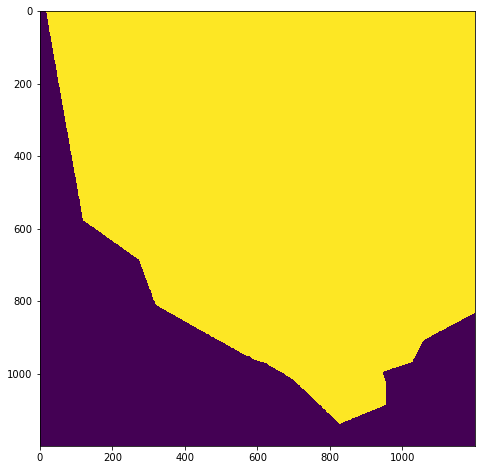

In [143]:
# create rasters from shapes files
mask = rasterio.features.rasterize(shapes=test_values, out_shape=(src.meta['height'],src.meta['width']), fill=0, transform=src.meta['transform'])

# plot figure
fig = plt.figure(figsize=(8,8))
plt.imshow(mask)

## Filter out smoke that covers large area...
* The segmentation mask will not work well if the smoke polygon covers the whole of california...
* Current heuristic....
    * Calculate Z-Score, filter out greater than 3SD of fire area & density == 5.0

In [8]:
from scipy import stats

In [14]:
## filter to just fire season in california
cali_fire_season_plumes = plumes_2018_df[(plumes_2018_df['month'] >= '05') & 
                                         (plumes_2018_df['month'] <= '11')].reset_index(drop=True)

## calculate area of smoke plume and zscore
cali_fire_season_plumes['area'] = cali_fire_season_plumes['geometry'].apply(lambda x: x.area)
cali_fire_season_plumes['area_zscore'] = stats.zscore(cali_fire_season_plumes['area'])
cali_fire_season_plumes['density_area_zscore'] = cali_fire_season_plumes.groupby(['Density'])['area'].transform(stats.zscore)

In [15]:
## remove plumes with area greater than 3 SD & density == 5.0

## old version.... leaves in too many large plumes..
# cali_fire_season_plumes = cali_fire_season_plumes[~((cali_fire_season_plumes['area_zscore']>3.0) & (cali_fire_season_plumes['Density']==5.0))]

cali_fire_season_plumes = cali_fire_season_plumes[~(((cali_fire_season_plumes['density_area_zscore']>3.0) & (cali_fire_season_plumes['Density']==5.0)) |
                                                  ((cali_fire_season_plumes['density_area_zscore']>3.5) & (cali_fire_season_plumes['Density']==16.0)))]

In [16]:
# filter the smoke plume data to what we need
# we want to keep the smoke plumes from up to 3 hours before image was taken

min_lag = 180

criteria_0 = cali_fire_season_plumes[(cali_fire_season_plumes['year'] == year) &
               (cali_fire_season_plumes['month'] == month) &
               (cali_fire_season_plumes['day'] == day) &
               (cali_fire_season_plumes['time'].astype(int) <= int(time)) &
               (cali_fire_season_plumes['time'].astype(int) > int(time)-min_lag)]

criteria_1 = cali_fire_season_plumes[(cali_fire_season_plumes['year'] == year) &
               (cali_fire_season_plumes['month'] == month) &
               (cali_fire_season_plumes['day'] == day) &
               (cali_fire_season_plumes['time'].astype(int) <= int(time))]

In [17]:
# get state shapes
state_shapes = h.get_state_shapes('../data/states/tl_2017_us_state.shp', ['California','Nevada'])
cali_bounds = state_shapes[state_shapes['STUSPS']=='CA']['geometry'].iloc[0].bounds

In [18]:
## done in step 0 notebook now
# cali_box_polygon = box(cali_bounds[0], cali_bounds[1], cali_bounds[2], cali_bounds[3])
# box_df = gpd.GeoDataFrame({'geometry':cali_box_polygon}, index=[0])
# clip_test = ec.clip_shp(criteria_0, box_df)
# clip_test = clip_test[~clip_test.is_empty]

In [19]:
criteria_0

Density           End  Satellite         Start  year month day  \
111      27.0  2018206 2202  GOES-EAST  2018206 2002  2018    07  25   
208       5.0  2018206 2202  GOES-EAST  2018206 2002  2018    07  25   
254      16.0  2018206 2202  GOES-EAST  2018206 2002  2018    07  25   
435      16.0  2018206 2202  GOES-EAST  2018206 2002  2018    07  25   
436       5.0  2018206 2202  GOES-EAST  2018206 2002  2018    07  25   
584       5.0  2018206 2202  GOES-EAST  2018206 2002  2018    07  25   
588      16.0  2018206 2202  GOES-EAST  2018206 2002  2018    07  25   
673      27.0  2018206 2202  GOES-EAST  2018206 2002  2018    07  25   
1453     27.0  2018206 2202  GOES-EAST  2018206 2002  2018    07  25   
1458      5.0  2018206 2202  GOES-EAST  2018206 2002  2018    07  25   
1678      5.0  2018206 2202  GOES-EAST  2018206 2002  2018    07  25   
1682     16.0  2018206 2202  GOES-EAST  2018206 2202  2018    07  25   
1748     27.0  2018206 2202  GOES-EAST  2018206 2202  2018    07  25   

     start_doy end_doy start_time end_time view  doy  time  \
111        206     206       2002     2202    C  206  2202   
208        206     206       2002     2202    C  206  2202   
254        206     206       2002     2202    C  206  2202   
435        206     206       2002     2202    C  206  2202   
436        206     206       2002     2202    C  206  2202   
584        206     206       2002     2202    C  206  2202   
588        206     206       2002     2202    C  206  2202   
673        206     206       2002     2202    C  206  2202   
1453       206     206       2002     2202    C  206  2202   
1458       206     206       2002     2202    C  206  2202   
1678       206     206       2002     2202    C  206  2202   
1682       206     206       2202     2202    C  206  2202   
1748       206     206       2202     2202    C  206  2202   

                                               geometry      area  \
111   POLYGON ((-123.39605 42.00950, -123.40333 41.9...  0.044438   
208   POLYGON ((-119.94319 42.00950, -119.97011 41.8...  5.664203   
254   POLYGON ((-121.08468 42.00950, -121.08114 41.9...  3.065098   
435   POLYGON ((-117.61129 40.79616, -117.60652 40.8...  0.220574   
436   POLYGON ((-117.67328 40.77709, -117.68758 40.8...  0.609702   
584   POLYGON ((-114.13121 41.58365, -114.54105 41.7...  0.409213   
588   POLYGON ((-115.04339 42.00950, -115.10789 41.9...  0.041895   
673   POLYGON ((-122.78821 40.77452, -122.62609 40.8...  0.986451   
1453  POLYGON ((-116.77029 33.67679, -116.86566 33.6...  0.291841   
1458  POLYGON ((-116.57956 33.61719, -116.66300 33.6...  0.902640   
1678  POLYGON ((-120.08431 37.61666, -120.10815 37.6...  8.000996   
1682  POLYGON ((-120.10219 37.61070, -120.15583 37.8...  5.600866   
1748  POLYGON ((-119.99490 37.52129, -120.04855 37.6...  2.197172   

      area_zscore  density_area_zscore  
111     -0.314798            -0.379915  
208      0.187362             0.171133  
254     -0.044883            -0.118933  
435     -0.299059            -0.357349  
436     -0.264288            -0.246868  
584     -0.282203            -0.263449  
588     -0.315025            -0.372326  
673     -0.230623            -0.224600  
1453    -0.292691            -0.339124  
1458    -0.238112            -0.222643  
1678     0.396169             0.364384  
1682     0.181703             0.093606  
1748    -0.122438            -0.024981

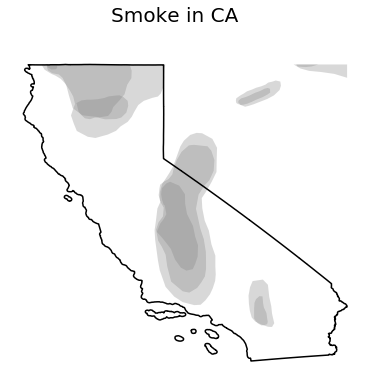

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(12, 6))
criteria_0.plot(ax=ax, alpha=0.3, color="grey")
state_shapes[state_shapes['STUSPS'].isin(['CA'])].boundary.plot(ax=ax, color='black')
#ax.set_title("Criteria 0")
ax.set_axis_off()

fig.suptitle("Smoke in CA", fontsize=20)
plt.show()

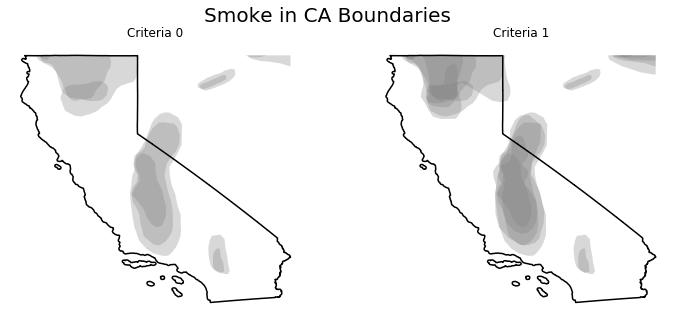

In [112]:
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
criteria_0.plot(ax=ax[0], alpha=0.3, color="grey")
state_shapes[state_shapes['STUSPS']=='CA'].boundary.plot(ax=ax[0], color='black')
ax[0].set_title("Criteria 0")
ax[0].set_axis_off()

criteria_1.plot(ax=ax[1], alpha=0.3, color="grey")
state_shapes[state_shapes['STUSPS']=='CA'].boundary.plot(ax=ax[1], color='black')
ax[1].set_title("Criteria 1")
ax[1].set_axis_off()

#box_df.boundary.plot(ax=ax, color="black")
fig.suptitle("Smoke in CA Boundaries", fontsize=20)
plt.show()

In [113]:
# mask image with shape files just to see 
out_img, out_transform = rasterio.mask.mask(src, criteria_0['geometry'].values)

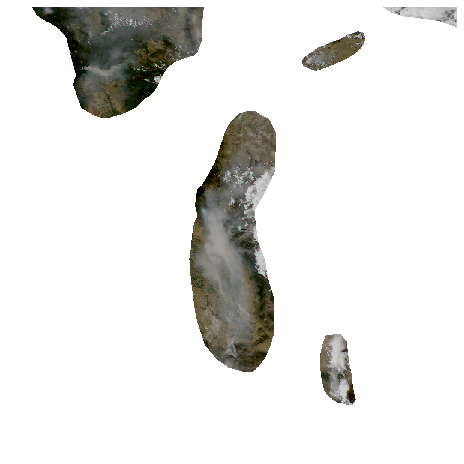

In [114]:
dv.show_figure(out_img)

## Testing area cropping and file saving

In [ ]:
files = sp.find_files_and_readers(
                               base_dir='../data/temp_netcdf/',
                               reader='abi_l1b')

scn = sp.Scene(reader='abi_l1b', filenames=files)

In [29]:
files

{'abi_l1b': ['../data/temp_netcdf/OR_ABI-L1b-RadC-M3C01_G16_s20182062202197_e20182062204570_c20182062205018.nc',
  '../data/temp_netcdf/OR_ABI-L1b-RadC-M3C02_G16_s20182062202197_e20182062204570_c20182062205014.nc',
  '../data/temp_netcdf/OR_ABI-L1b-RadC-M3C03_G16_s20182062202197_e20182062204570_c20182062205018.nc',
  '../data/temp_netcdf/OR_ABI-L1b-RadC-M3C07_G16_s20182062202197_e20182062204582_c20182062205018.nc',
  '../data/temp_netcdf/OR_ABI-L1b-RadC-M3C11_G16_s20182062202197_e20182062204570_c20182062205019.nc']}

In [31]:
cali_bounds = (-124.48200299999999, 32.528832, -114.131211, 42.009502999999995)

width = 1200    # width of the result domain in pixels
height = 1200   # height of the result domain in pixels

scn.load(['true_color'])

area_id = "California"
description = "California in Geodetic Projection"
proj_id = 'California'
proj_dict = {"proj": "latlong", "lat_ts": 0, "lon_0": 0}
area_def = AreaDefinition(area_id, proj_id, description, proj_dict, width, height, cali_bounds)

In [ ]:
scn = scn.resample(area_def, resampler='nearest')
scn.show('true_color')

In [ ]:
scn.save_datasets(writer='geotiff',
                       datasets=['true_color'], 
                       filename="../data/img/{name}_"+h.get_satpy_filename(scn['true_color'].attrs)+".tiff")

## Download AWS files and process with satpy

In [43]:
plumes_2018_df[plumes_2018_df['doy']=='203']

Density           End  Satellite         Start  year month day start_doy  \
671      5.0  2018203 1902  GOES-EAST  2018203 1712  2018    07  22       203   
672      5.0  2018203 2245  GOES-EAST  2018203 2130  2018    07  22       203   
673      5.0  2018203 2300  GOES-EAST  2018203 2300  2018    07  22       203   
676     16.0  2018203 1902  GOES-EAST  2018203 1712  2018    07  22       203   
677     16.0  2018203 2245  GOES-EAST  2018203 2130  2018    07  22       203   
678     16.0  2018204 0115  GOES-EAST  2018203 2200  2018    07  22       203   
679     16.0  2018204 0115  GOES-EAST  2018203 2200  2018    07  22       203   
680     16.0  2018204 0115  GOES-EAST  2018203 2200  2018    07  22       203   
681     16.0  2018204 0115  GOES-EAST  2018203 2200  2018    07  22       203   
682     27.0  2018203 2045  GOES-EAST  2018203 1930  2018    07  22       203   
683     27.0  2018204 0115  GOES-EAST  2018203 2200  2018    07  22       203   

    end_doy start_time end_time view  doy  time  \
671     203       1712     1902    C  203  1902   
672     203       2130     2245    F  203  2245   
673     203       2300     2300    F  203  2300   
676     203       1712     1902    C  203  1902   
677     203       2130     2245    F  203  2245   
678     204       2200     0115    F  203  2345   
679     204       2200     0115    F  203  2345   
680     204       2200     0115    F  203  2345   
681     204       2200     0115    F  203  2345   
682     203       1930     2045    F  203  2045   
683     204       2200     0115    F  203  2345   

                                              geometry  
671  POLYGON ((-119.76040 37.54127, -119.66763 37.5...  
672  POLYGON ((-121.89129 37.48916, -121.97918 37.5...  
673  POLYGON ((-121.89288 37.48395, -121.94952 37.4...  
676  POLYGON ((-119.86637 37.58097, -119.74333 37.5...  
677  POLYGON ((-121.86981 37.49112, -121.85418 37.5...  
678  POLYGON ((-119.54119 37.56963, -119.59364 37.5...  
679  POLYGON ((-119.45059 37.55532, -119.53165 37.4...  
680  POLYGON ((-119.45059 37.55532, -119.53165 37.4...  
681  POLYGON ((-119.45059 37.55532, -119.53165 37.4...  
682  POLYGON ((-119.65741 37.61074, -119.66229 37.5...  
683  POLYGON ((-119.54857 37.66085, -119.54271 37.5...

In [ ]:
import requests.exceptions as re
import warnings
warnings.simplefilter("ignore", (UserWarning, FutureWarning, RuntimeWarning))

cali_bounds = (-124.48200299999999, 32.528832, -114.131211, 42.009502999999995)

start_time = time.time()
data_file_path = '../data/'

while True:
    try:
        dd.goes_download_wrapper_satpy(smoke_plume_data=plumes_2018_df,
                                       temp_data_path=data_file_path+'temp_netcdf/',
                                 save_data_path=data_file_path+'netcdf_2018_satpy/', 
                                 extra_desc='cali', 
                                 bounds=cali_bounds, 
                                 bands=[1,2,3,7,11])
        break
    except (re.SSLError, re.ConnectionError, re.ChunkedEncodingError) as e:
        print("Connection Error. Continuing.")
        
print("--- %s seconds ---" % (time.time() - start_time))

## Generate masks from .tiff images

In [117]:
## remove fires that occurred at night in california
plumes_2018_df_daytime = plumes_2018_df[~((plumes_2018_df['time'] > '0030') & 
                                          (plumes_2018_df['time'] <= '1400'))].reset_index(drop=True).sort_values(['year',
                                                                                                                   'month',
                                                                                                                   'day',
                                                                                                                   'time'])

In [118]:
plumes_2018_df_daytime[(plumes_2018_df_daytime['month']=='08') & 
               (plumes_2018_df_daytime['day']=='03')]

Density           End  Satellite         Start  year month day start_doy  \
647     27.0  2018216 0115  GOES-EAST  2018215 1915  2018    08  03       215   
648     27.0  2018216 0115  GOES-EAST  2018215 1915  2018    08  03       215   
646      5.0  2018216 0112  GOES-EAST  2018215 1922  2018    08  03       215   

    end_doy start_time end_time view  doy  time  \
647     216       1915     0115    F  215  2345   
648     216       1915     0115    F  215  2345   
646     216       1922     0112    C  215  2357   

                                              geometry  
647  POLYGON ((-122.80448 39.31248, -122.18459 39.2...  
648  POLYGON ((-121.00680 41.18168, -120.74931 41.1...  
646  POLYGON ((-115.42231 32.79140, -115.38481 32.7...

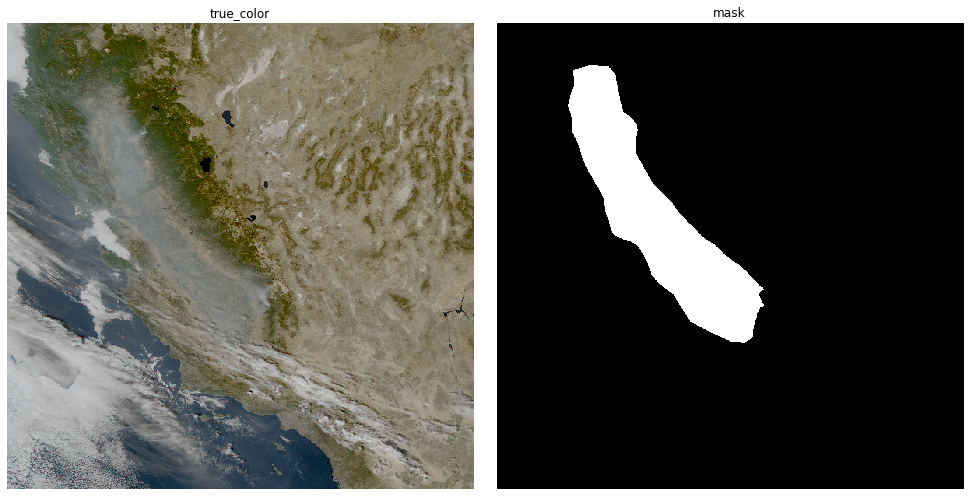

In [102]:
dv.show_img_mask('true_color_G16_doy322_s201811181800_e201811181811', plumes_2018_df_daytime, bands=['true_color'], labels=True)

In [24]:
# open the geo .tiff file
src = rasterio.open('../data/img/' + src_file_name)

smoke_df_geoms = criteria_0['geometry'].values

# create rasters from shapes files
mask = rasterio.features.rasterize(shapes=smoke_df_geoms, out_shape=(src.meta['height'], src.meta['width']), fill=0,
                                   transform=src.meta['transform'])

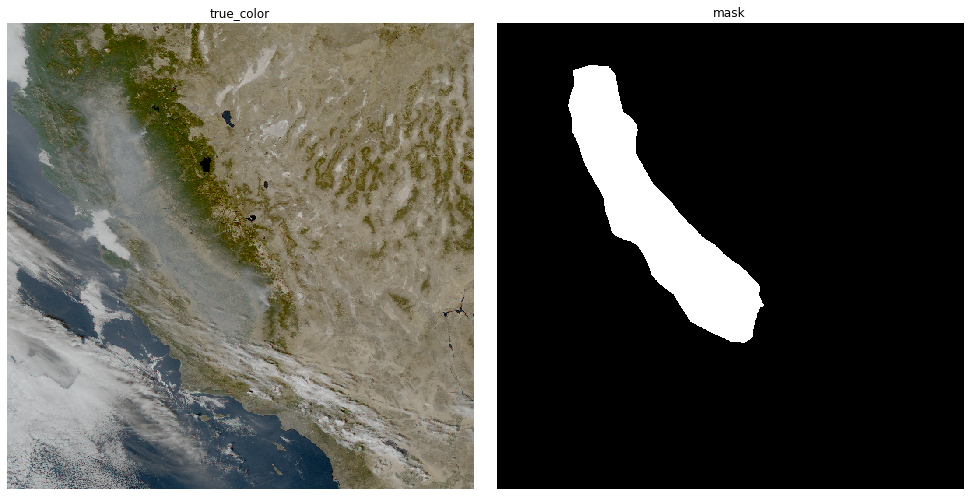

In [118]:
# true_color_G16_doy206_s201807252202_e201807252204
# true_color_G16_doy182_s201807012030_e201807012041.tiff
dv.show_img_mask('true_color_G16_doy322_s201811181800_e201811181811.tiff', 
                 cali_fire_season_plumes, 
                 bands=['true_color'], 
                 labels=True)

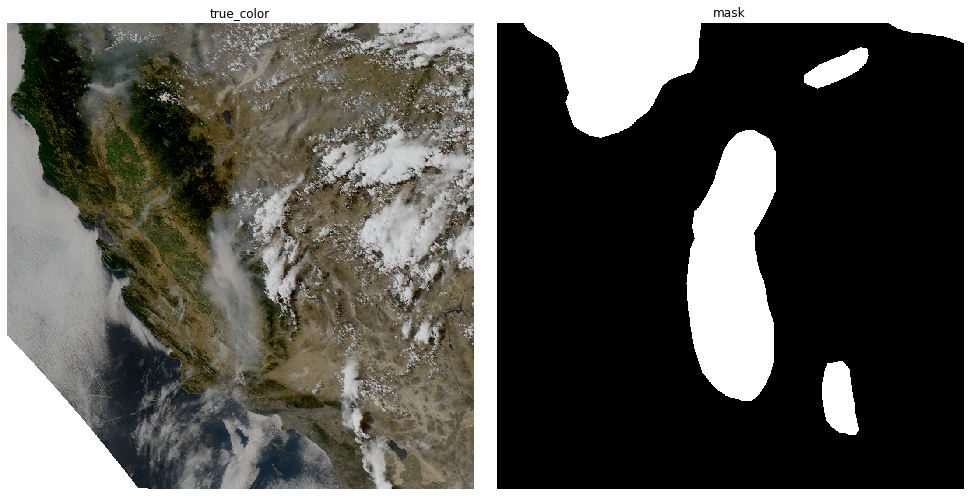

In [116]:
dv.show_img_mask(src_file_name, 
                 cali_fire_season_plumes, 
                 bands=['true_color'], 
                 labels=True)

In [115]:
## save filtered smoke plume dataframe
cali_fire_season_plumes.to_file('../data/' + "ca_nv_fire_season_plumes.geojson", driver='GeoJSON')

In [125]:
img_files[0]

'../data/img/true_color_G16_doy322_s201811181800_e201811181811.tiff'